## Project Steps :
    ### Data Preprocessing :
    - Load the data
    - Check for missing value
    - Check for duplicate entries
    - Perform exploratory data analysis (EDA) to understand the data and identify any patterns or correlations
    - Perform data preprocessing steps such as encoding categorical variables, scaling numerical variables, handling outliers (Robust Scaler) and Impuuting missing values.
    - Pipelines
    ### Machine Learning :
    - Splitting to X & Y (Data already is Train & Test)
    - Treating Imbalance 
    - Select the appropriate machine learning model for predicting the presence of genetic mutations
    - Perform hyperparameter tuning using Grid Search , Randomized Search with cross-validation to find the best combination of   hyperparameters for the selected model
    - Train the selected machine learning model using the training dataset
    - Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1 score
    ### Model Evaluation :
    - Evaluate the trained model using Cross Val Score then Test dataset to assess its performance
    - Compare the model's performance

# 1-Data Preprocessing & EDA :

### 1.1 Preprocessing (Data Mining / Null Values / Drop Columns / General Cleaning):

In [1]:
# import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Working on Colab :
# from google.colab import files
# uploaded_1 = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded_1['file.csv']))

In [3]:
train_gene = pd.read_csv(r"C:\Users\ooo\OneDrive\Desktop\Final Project\train.csv")
test_gene = pd.read_csv(r"C:\Users\ooo\OneDrive\Desktop\Final Project\test.csv")

In [4]:
# Concat Train & Test Files For Simple EDA
# gene = pd.concat([test.assign(ind="test"), train.assign(ind="train")])
# gene.shape

In [5]:
train_gene.shape

(22083, 45)

In [6]:
test_gene.shape

(9465, 43)

In [7]:
train_gene.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [8]:
train_gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [9]:
train_gene.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_gene.describe(include='O')

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,22083,22083,21777,19273,22083,22083,12392,22083,16977,22083,...,19966,19931,19930,19888,19961,19911,19929,19938,19937,19915
unique,22083,2,2,2,2,2524,6282,16368,27,26,...,2,2,4,4,2,2,2,4,3,9
top,PID0x6418,Yes,No,Yes,No,James,Smith,Clardie,Not applicable,-,...,Yes,No,Not applicable,-,Yes,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,13143,13133,10647,12508,420,157,6,8440,10931,...,10087,10012,5029,5042,10012,10082,9977,5128,10202,5160


In [11]:
train_gene.duplicated().sum()

0

In [12]:
# List of columns to drop
columns_to_drop = [
    "Patient Id", "Patient First Name", "Family Name", "Father's name", "Location of Institute",
    "Genes in mother's side", "Institute Name", "Test 1", "Test 2", "Test 3", "Test 4",
    "Test 5", "Symptom 1", "Symptom 2", "Parental consent", "Inherited from father",
    "Place of birth", "Symptom 3", "Symptom 4", "Symptom 5"]

# Drop columns from both train_gene and test_gene
for df in [train_gene, test_gene]:
    df.drop(columns=columns_to_drop, inplace=True)


In [13]:
# replace unknown values by nan :
for df in [train_gene, test_gene]:
    df.replace(['-99', '-'], np.nan, inplace=True)

In [14]:
# Checking Null Values :
train_gene.isna().mean()

Patient Age                                         0.064620
Maternal gene                                       0.127247
Paternal gene                                       0.000000
Blood cell count (mcL)                              0.000000
Mother's age                                        0.273332
Father's age                                        0.271068
Status                                              0.000000
Respiratory Rate (breaths/min)                      0.097315
Heart Rate (rates/min                               0.095684
Follow-up                                           0.098084
Gender                                              0.098401
Birth asphyxia                                      0.096862
Autopsy shows birth defect (if applicable)          0.198886
Folic acid details (peri-conceptional)              0.095866
H/O serious maternal illness                        0.097451
H/O radiation exposure (x-ray)                      0.320110
H/O substance abuse     

In [15]:
# Treating Null Values :
catego_cols = train_gene.select_dtypes(include="O")
for col in catego_cols:
    train_gene[col] = train_gene[col].fillna(train_gene[col].mode().iloc[0])
numri_cols = train_gene.select_dtypes(include=['float', 'int'])
for col in numri_cols:
    train_gene[col] = train_gene[col].fillna(train_gene[col].median())

In [16]:
# Replacing Spaces with Underscore :
# Either took substance or not (making categories yes or no):
for df in [train_gene, test_gene]:
    df.columns = df.columns.str.replace(" ", "_")
    df['H/O_substance_abuse'].replace('Not applicable', 'No', inplace=True)


In [17]:
# Define the renaming dictionary
rename_dict = {
    'Blood_cell_count_(mcL)': 'Blood_cell_count',
    "Respiratory_Rate_(breaths/min)": "Respiratory_Rate",
    'Autopsy_shows_birth_defect_(if_applicable)': 'Autopsy_shows_birth_defect',
    'Folic_acid_details_(peri-conceptional)': 'Folic_acid',
    'No._of_previous_abortion': 'Previous_abortion',
    "Mother's_age": "Mother_age",
    "Father's_age": "Father_age",
    'H/O_radiation_exposure_(x-ray)': 'radiation_exposure_x_ray',
    'H/O_serious_maternal_illness': 'serious_maternal_illness',
    'Heart_Rate_(rates/min': 'Heart_Rate',
    'White_Blood_cell_count_(thousand_per_microliter)': 'White_Blood_cell_count_thousand_per_microliter'
}

# Rename columns in both train_gene and test_gene
for df in [train_gene, test_gene]:
    df.rename(columns=rename_dict, inplace=True)

In [18]:
columns_to_convert = ['Patient_Age', 'Father_age', 'Mother_age']
# Convert each column to numeric with coercion for errors
for column in columns_to_convert:
    train_gene[column] = pd.to_numeric(train_gene[column], errors='coerce')
    test_gene[column] = pd.to_numeric(test_gene[column], errors='coerce')

In [19]:
disorder_mapping = {
    'Mitochondrial genetic inheritance disorders': 'Mitochondrial',
    'Multifactorial genetic inheritance disorders': 'Multifactorial',
    'Single-gene inheritance diseases': 'Single_gene'
}

# Apply the mapping to train_gene :
train_gene['Genetic_Disorder'] = train_gene['Genetic_Disorder'].replace(disorder_mapping)

In [20]:
for df in [train_gene, test_gene]:
    df['Birth_asphyxia'].replace('Not available', 'No record', inplace=True)

### 1.2 Univariate Analysis :

In [21]:
#Categorical & Numerical columns :
cat_cols = train_gene.select_dtypes(include = "O").columns.to_list()
num_cols = train_gene.select_dtypes(include=['float', 'int']).columns.to_list()

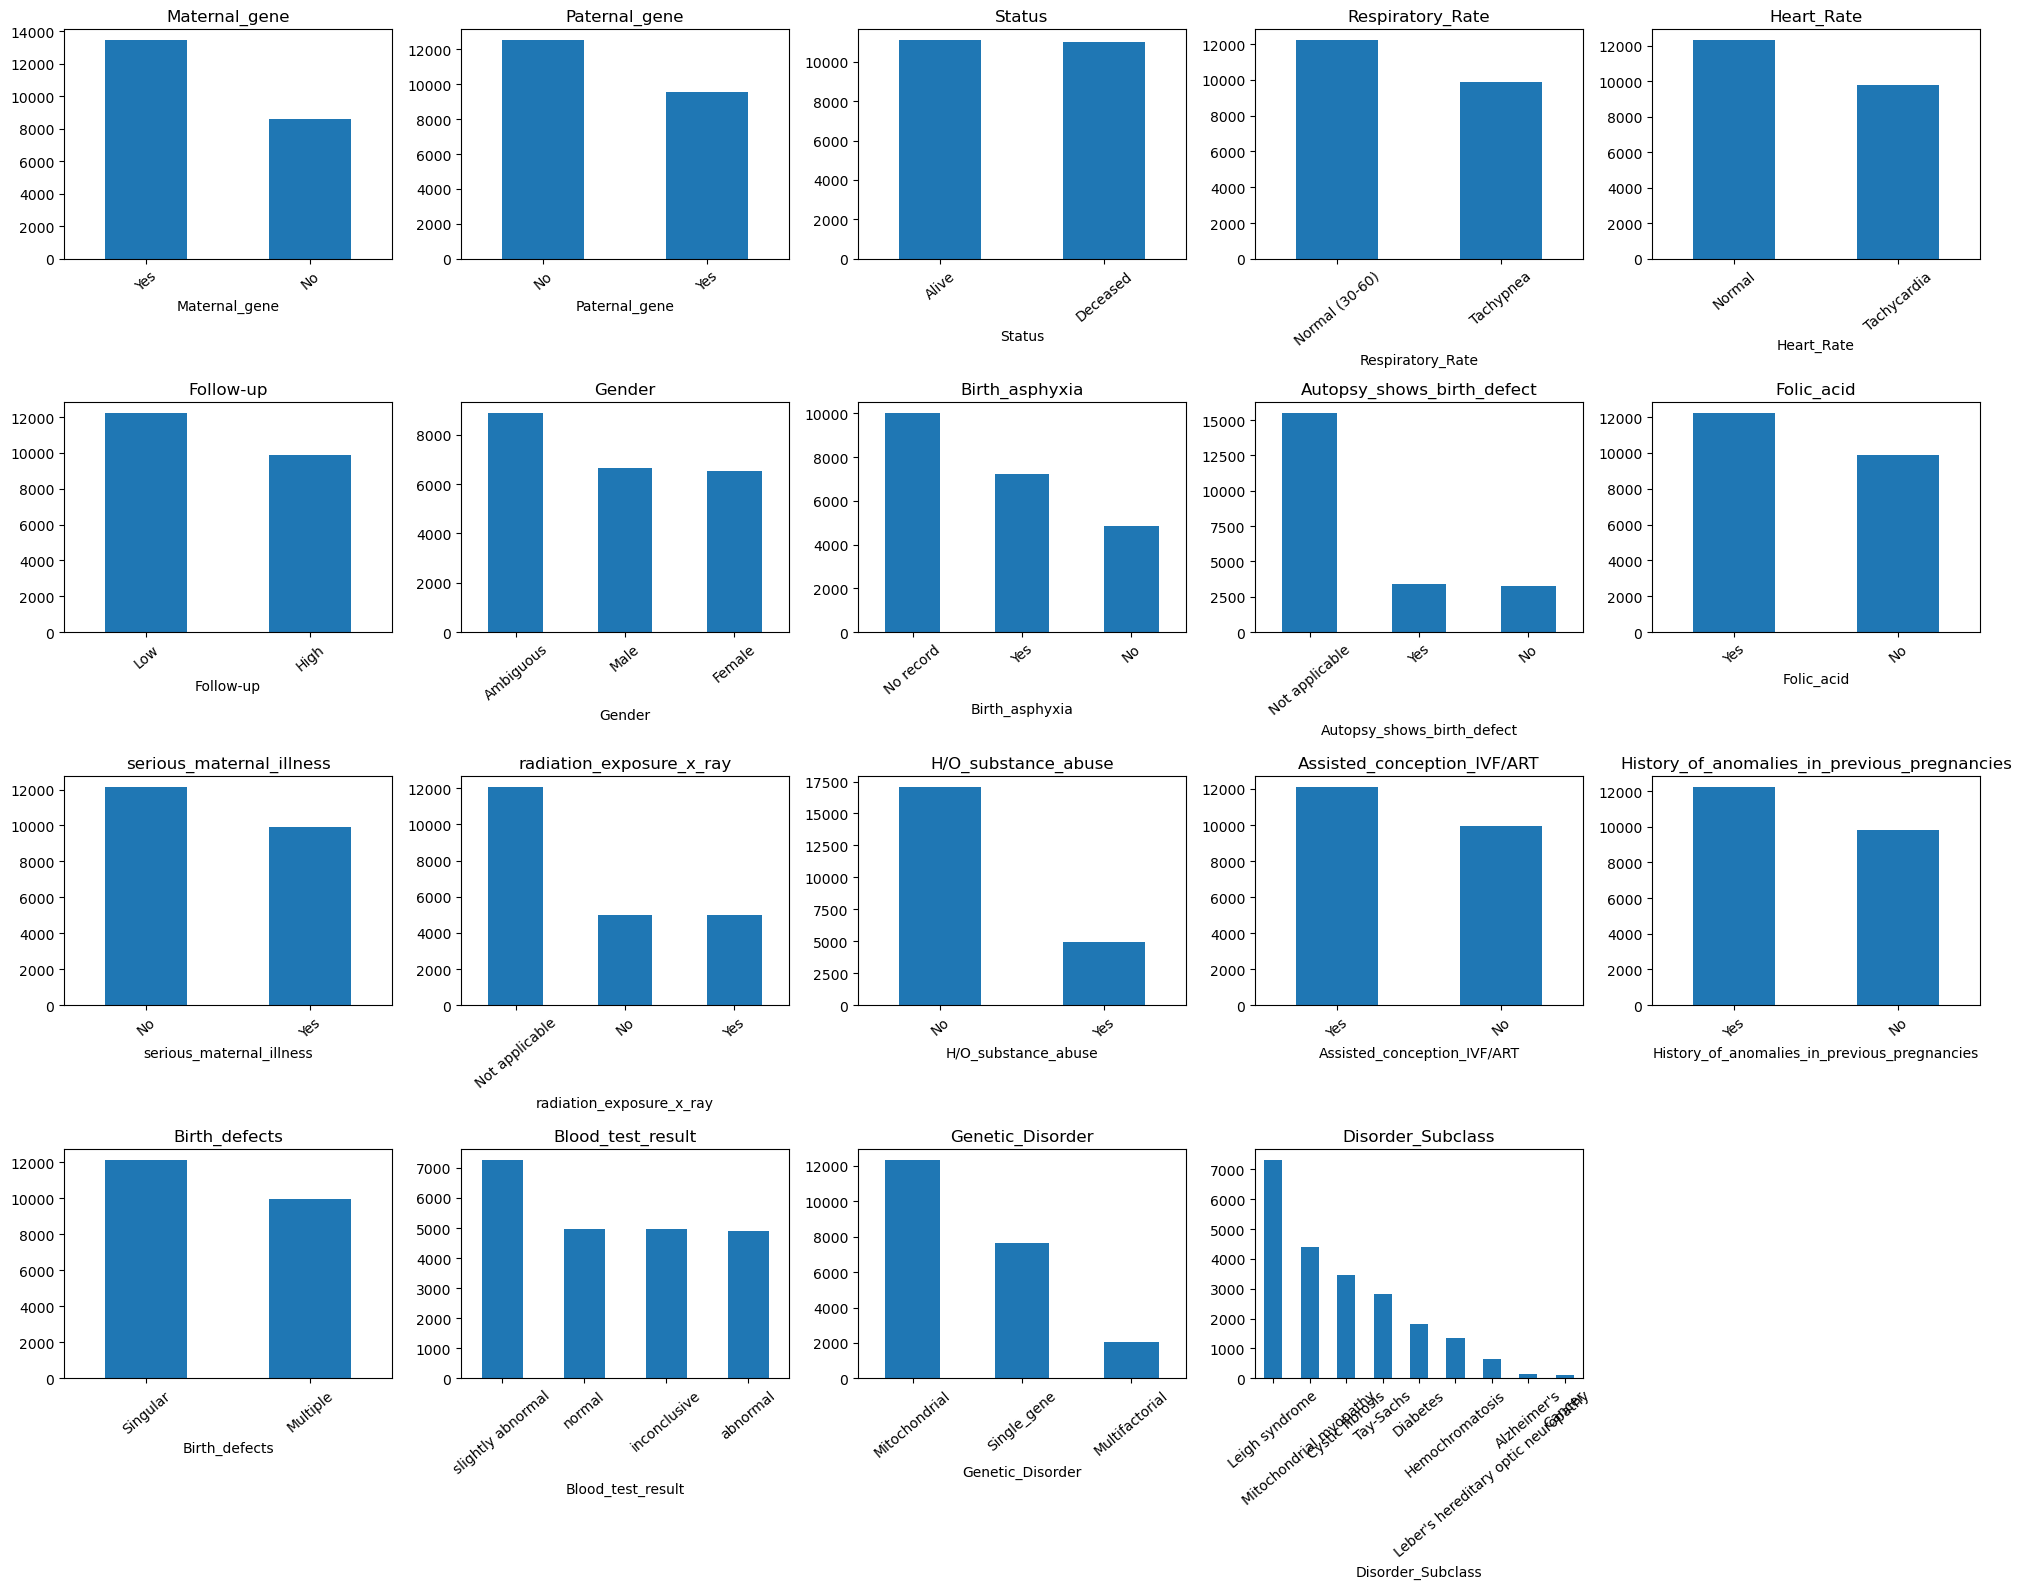

In [22]:
# Quick look on categorical columns :
import math
from matplotlib import pyplot as plt
# Determine the optimal number of rows and columns
n_cols = math.ceil(math.sqrt(len(cat_cols)))
n_rows = math.ceil(len(cat_cols) / n_cols)
# Create the figure with an appropriate size
fig = plt.figure(figsize=(n_cols * 4, n_rows * 4))
# Plot each categorical column as a bar plot
for i, col in enumerate(cat_cols):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    train_gene[col].value_counts().plot(kind="bar", ax=ax, title=col, rot=40)
# Adjust layout
fig.tight_layout()
plt.show()

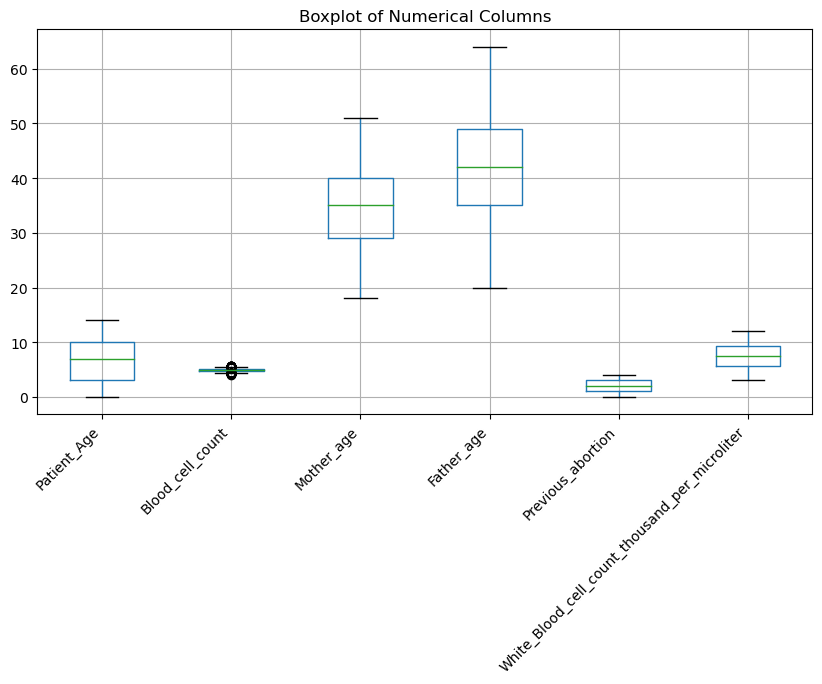

In [23]:
# Quick look on Numerical columns :
# Select numerical columns
numerical_gene = train_gene.select_dtypes(include=['float', 'int'])
# Create boxplot
plt.figure(figsize=(10, 5))
numerical_gene.boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Numerical Columns')
plt.show()

### 1.3 Bivariate & Multivariate Analysis :

### Disorder Classes With Sub-classes :

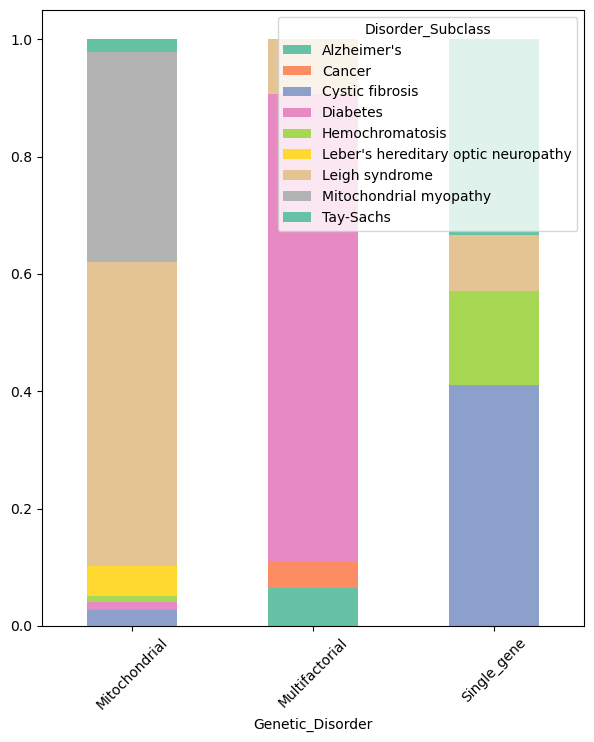

In [24]:
disease = train_gene.groupby('Genetic_Disorder')['Disorder_Subclass'].value_counts(normalize=True)
disease = disease.unstack()
fig, ax = plt.subplots(figsize=(7, 8))  # Adjust the figsize (width, height) as needed
disease.plot(kind='bar', stacked=True, color=sns.color_palette("Set2", 9), ax=ax)
plt.xticks(rotation=45)
plt.show()

### Correlation between Numerical Values :

In [25]:
# Calculate correlation matrix for numerical columns
numerical_gene.corr()

,Patient_Age,Blood_cell_count,Mother_age,Father_age,Previous_abortion,White_Blood_cell_count_thousand_per_microliter
Patient_Age,1.000000,0.010456,-0.006664,-0.008167,-0.006681,-0.007823
Blood_cell_count,0.010456,1.000000,-0.006284,0.002819,-0.005695,-0.000993
Mother_age,-0.006664,-0.006284,1.000000,-0.000175,0.006596,0.012798
Father_age,-0.008167,0.002819,-0.000175,1.000000,0.000450,0.010690
Previous_abortion,-0.006681,-0.005695,0.006596,0.000450,1.000000,0.003437
White_Blood_cell_count_thousand_per_microliter,-0.007823,-0.000993,0.012798,0.010690,0.003437,1.000000


<Axes: >

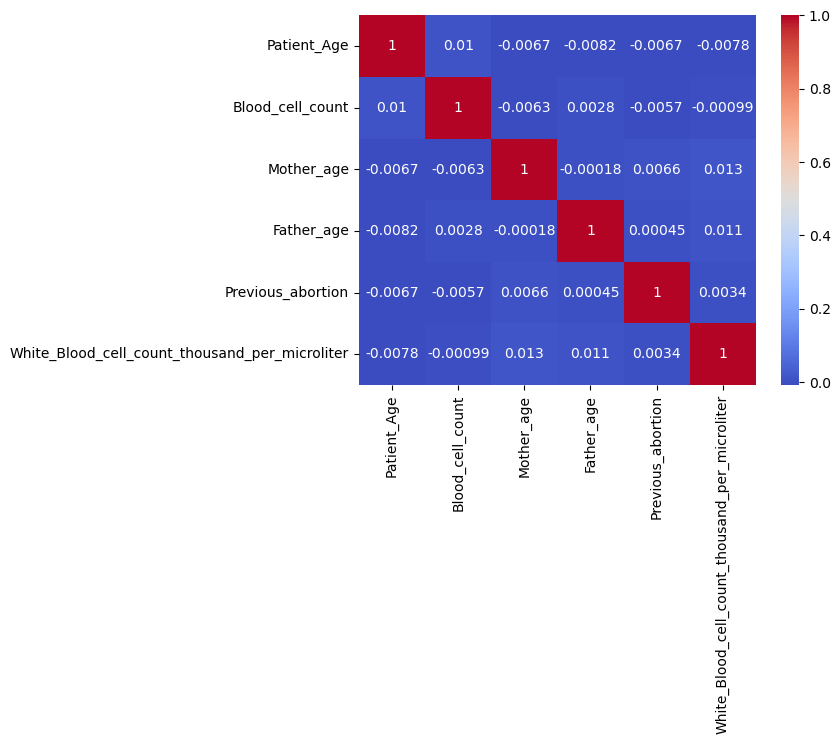

In [26]:
corr_map = sns.heatmap(numerical_gene.corr() ,  cmap='coolwarm' ,  annot=True)
corr_map

### Maternal gene effect on all Disorders :

c:\Users\ooo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


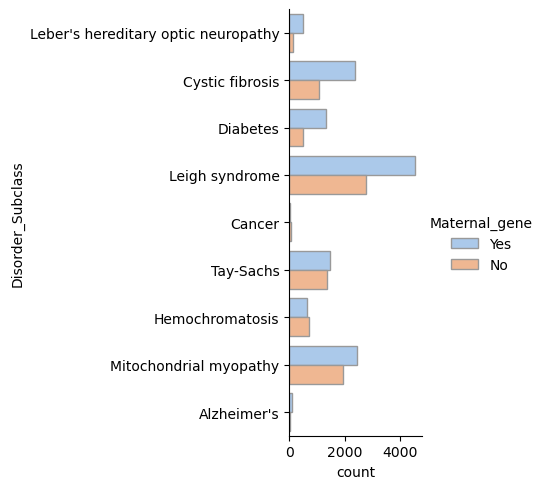

In [27]:
# Maternal Gene for each Disorder_Subclass:
maternal = sns.catplot(
    data = train_gene, y="Disorder_Subclass", hue="Maternal_gene", kind="count",
    palette="pastel", edgecolor=".6",)
maternal

In [28]:
# Maternal gene is of higher effect than that of Paternal gene.

### Is there a relation between Gender and the presence of a Genetic Disorder?

<Axes: xlabel='Gender', ylabel='count'>

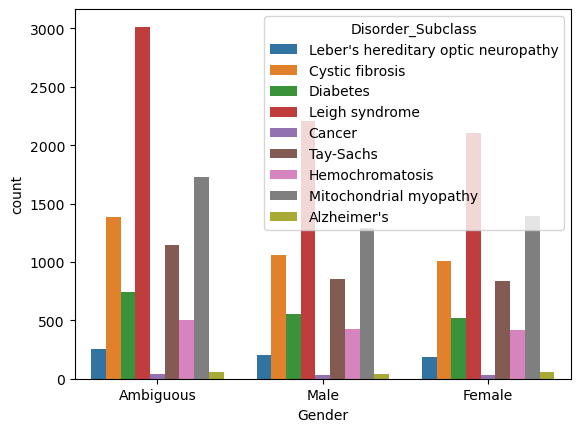

In [29]:
fig2 = sns.countplot(x='Gender', hue='Disorder_Subclass', data=train_gene)
fig2

In [30]:
# Leigh Syndrome is of very percentage in ambiguous gender.

In [31]:
pl = train_gene['Birth_defects'].value_counts().reset_index()
pl

,Birth_defects,count
0,Singular,12131
1,Multiple,9952


### Does the Birth_asphyxia status relate to the occurrence of Birth_defects?

<Axes: xlabel='Birth_defects', ylabel='count'>

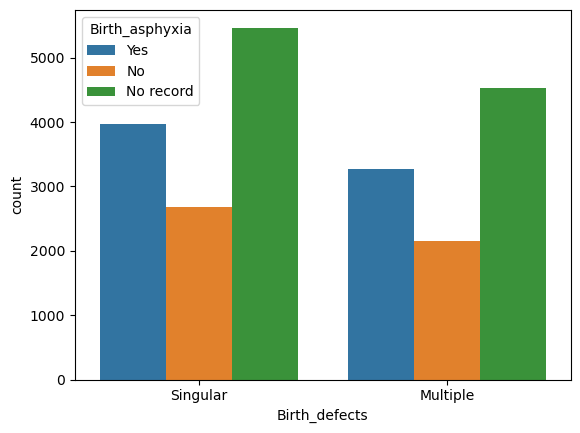

In [32]:
fig3 = sns.countplot(x='Birth_defects', hue='Birth_asphyxia', data=train_gene )
fig3  

In [33]:
# Yes, Birth_asphyxia (lack of Oxygen) led to Birth_defects(singular is higher than multiple).

### How does the Patient_Age vary across different levels of Genetic_Disorder?

<Axes: xlabel='Patient_Age', ylabel='Disorder_Subclass'>

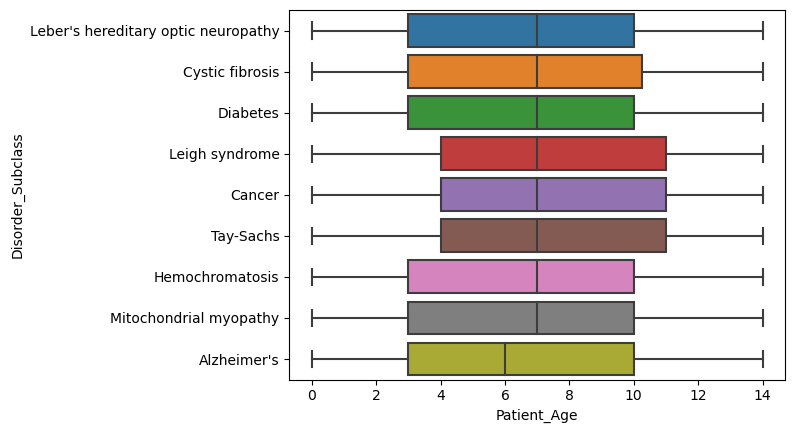

In [34]:
# Patient Age boxes according to each Disorder_Subclass :
plot = sns.boxplot( y='Disorder_Subclass', x='Patient_Age', data=train_gene)
plot

In [35]:
# Patient Ages are of approximate range across all Disorder Subclasses.

### Did Following up the treatment of the patients affect their lives?
###          (I mean the parents carefullness) 

In [36]:
status = train_gene.groupby("Follow-up")['Status'].value_counts().reset_index()
status

,Follow-up,Status,count
0,High,Alive,4956
1,High,Deceased,4921
2,Low,Alive,6127
3,Low,Deceased,6079


In [37]:
fig_status = px.sunburst(status, path=['Follow-up', 'Status'], values='count') 
fig_status.show()

In [38]:
# Low Follow up led to more deceased Patients.

### Is there any Birth defects besides Folic acid ?

In [39]:
tree = train_gene[train_gene['Folic_acid'] == 'Yes'].groupby('Genetic_Disorder')['Birth_defects'].value_counts().reset_index()
fig = px.icicle(tree, path=['Genetic_Disorder', 'Birth_defects'], values='count')
fig.update_layout(
    iciclecolorway = ["pink", "lightgray", "grey"],
    margin = dict(t=50, l=25, r=25, b=25))

In [40]:
# Yes, although the mothers took Folic Acid but there were high Birth_defects(specially singular).

### Does Maternal illness affect the abortion ?

In [41]:
train_gene['Previous_abortion'] = train_gene['Previous_abortion'].replace(-99 , train_gene['Previous_abortion'].median())
train_gene.groupby('serious_maternal_illness')['Previous_abortion'].median()

serious_maternal_illness
No     2.0
Yes    2.0
Name: Previous_abortion, dtype: float64

In [42]:
# I replaced the -99 with nan in test data, it will be filled later by imputer:
test_gene['Previous_abortion'] = test_gene['Previous_abortion'].replace(-99 , 'nan')

In [43]:
# No, There is no relation between the maternal illness and the number of abortions.

### What are the Ranges of Red Blood Cells & White Blood Cells ?

In [44]:
pivot = pd.pivot_table(train_gene , values = ['Blood_cell_count','White_Blood_cell_count_thousand_per_microliter'], index = 'Genetic_Disorder' , aggfunc=np.median)
pivot

,Blood_cell_count,White_Blood_cell_count_thousand_per_microliter
Genetic_Disorder,,
Mitochondrial,4.900854,7.477132
Multifactorial,4.892773,7.477132
Single_gene,4.899106,7.477132


In [45]:
# White blood cells(WBC)   ----->	4500-11,000/mm3
# Red blood cells(RBC)     ----->   Male: 4.3-5.9 million/mm3 
#                          ----->   Female: 3.5-5.5 million/mm3
#So, they are normal.

#### Do babies Who Suferred Asphyxia (Alive), Are Still Suffereing Upnoramal Respiratory Rates?

In [46]:
respiro = train_gene[(train_gene['Birth_asphyxia'] == 'Yes') & (train_gene['Status']=='Alive')]['Respiratory_Rate'].value_counts(normalize=True).reset_index()
respiro

,Respiratory_Rate,proportion
0,Normal (30-60),0.549755
1,Tachypnea,0.450245


In [47]:
px.pie(respiro, names='Respiratory_Rate',values='proportion')

In [48]:
#No, Most of them are of normal respiratory rate.

### Detecting Imbalance :

Text(0.5, 1.0, 'Checking Imbalance')

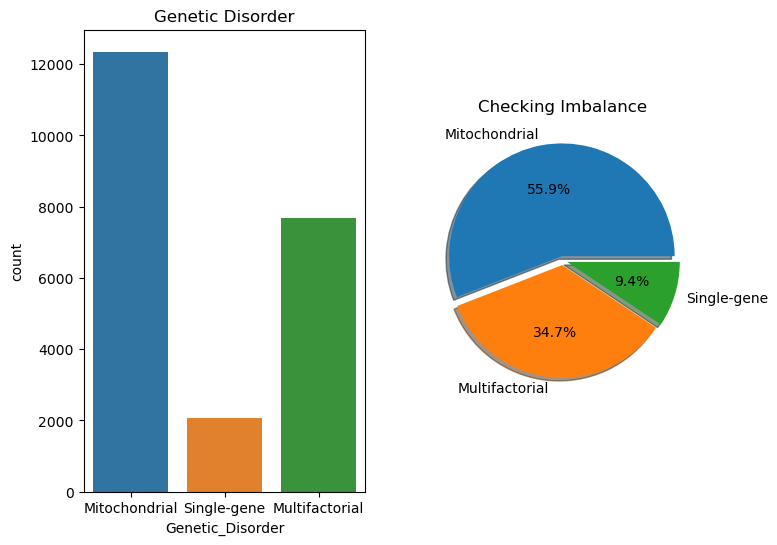

In [49]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(train_gene,x='Genetic_Disorder')
plt.xticks(ticks=[0, 1, 2], labels=['Mitochondrial', 'Single-gene' , 'Multifactorial'])
plt.title("Genetic Disorder")
plt.subplot(1,2,2)
plt.pie(x=[train_gene['Genetic_Disorder'].value_counts()[0],train_gene['Genetic_Disorder'].value_counts()[1],train_gene['Genetic_Disorder'].value_counts()[2]],
        explode=[0.04,0.04,0.04],labels=['Mitochondrial','Multifactorial','Single-gene'],shadow=True,autopct='%.1f%%')
plt.title("Checking Imbalance")

# 2-Machine Learning :

### 2.1 Data Preparation
#### Splitting 

In [50]:
# Splitting The Train into x, y :
x_train = train_gene.drop('Genetic_Disorder', axis=1)
y_train = train_gene['Genetic_Disorder']
x_test  = test_gene

### Pipeline 

#### Imputing / Normalization / Encoding /SMOTETomek (Imbalance)

In [51]:
# Listing the Categorical & Numerical columns :
categoric_columns = x_test.select_dtypes(include = 'O').columns.to_list()
numeric_columns = x_test.select_dtypes(include=['int' , 'float']).columns.tolist()

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Impute numerical columns with median
            ('scaler', RobustScaler())  # Scale numerical columns
        ]), numeric_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical columns with mode
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical columns
        ]), categoric_columns)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('smote', SMOTE(sampling_strategy = 'auto', random_state=42)),  # Apply balancing
])

In [53]:
# Encoding the Target Column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [54]:
# Fit and resample the training data
x_train_transformed, y_train_transformed = pipeline.fit_resample(x_train, y_train_encoded)
# For the test data, only apply the preprocessing (no resampling)
x_test_transformed = pipeline.named_steps['preprocessor'].transform(x_test)

In [61]:
# Check the class distribution after SMOTE
class_distribution = pd.Series(y_train_transformed).value_counts()
print("Class distribution after SMOTE:")
print(class_distribution)

Class distribution after SMOTE:
0    12348
1    12348
2    12348
Name: count, dtype: int64


### 2.2 Model Selesction:
#### #Hyperparameter Tuning / Grid Search / Randomized Search / Confusion Matrix / AUC Curve / ROC_Score 

#### Logistic Regression:

#### Grid Search with Cross Validation :

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Define the logistic regression model
lr = LogisticRegression(random_state=100)

# Step 2: Define the hyperparameter grid for GridSearchCV
param_grid = {'C': [0.0001, 0.01, 0.1], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'] ,'class_weight': [{0: 1, 1: 1, 2: 2}, 'balanced']}

# Step 3: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_transformed, y_train_transformed)

# Step 4: Extract the best model and its parameters
best_model = grid_search.best_estimator_

print(f"The best score: {grid_search.best_score_}, with the best parameters: {grid_search.best_params_}")

The best score: 0.3955836576669493, with the best parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


#### Cross Val Score On The Best Model (Grid Search) :

In [57]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
#Perform Cross val score with the best model (using F1 micro as the scoring metric)
best_model = grid_search.best_estimator_
cv_scores1 = cross_val_score(best_model, x_train_transformed, y_train_transformed, cv=5, scoring='f1_micro')
print(f'Cross-Validation Scores with Best Model: {cv_scores1}')
print(f'Mean Cross-Validation F1 Score: {cv_scores1.mean():.4f}')

Cross-Validation Scores with Best Model: [0.3869618  0.39465515 0.39924416 0.4004589  0.39659827]
Mean Cross-Validation F1 Score: 0.3956


### Decision Tree :

#### RandomizedSearch

In [72]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 5],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"],
              "class_weight": [None, 'balanced'] }
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier(random_state=100)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5 , random_state = 100)
# Fit it to the data
tree_cv.fit(x_train_transformed , y_train_transformed)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.44479592489666564


#### Cross Val Score On The Best Model (Randomized Search)

In [73]:
from sklearn.model_selection import cross_val_predict, cross_val_score
#Initialize the best model from RandomizedSearchCV
best_tree = tree_cv.best_estimator_
# Perform cross-validation with f1_macro scoring
cv_scores3 = cross_val_score(best_tree, x_train_transformed, y_train_transformed, cv=5, scoring='f1_micro')
# Print cross-validation scores
print(f'Cross-Validation Scores (f1_macro): {cv_scores3}')
print(f'Mean Cross-Validation f1_macro Score: {cv_scores3.mean():.4f}')

Cross-Validation Scores (f1_macro): [0.38156296 0.4516129  0.45660683 0.46915913 0.4650378 ]
Mean Cross-Validation f1_macro Score: 0.4448


#### RANDOM FOREST :

#### RandomizedSearch

In [74]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Setup the parameters and distributions to sample from: 
param_dist = {"n_estimators":[100,200,300],
              "max_depth": randint(1,9),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"],
              "class_weight": [None, 'balanced'] }
# Instantiate a Random Forest classifier: 
forest = RandomForestClassifier(random_state=100)
# Instantiate the RandomizedSearchCV object: 
forest_cv = RandomizedSearchCV(forest, param_dist, cv=5 , random_state=100)
# Fit it to the data
forest_cv.fit(x_train_transformed,y_train_transformed)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(forest_cv.best_params_))
print("Best score is {}".format(forest_cv.best_score_))

Tuned Decision Tree Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 8, 'n_estimators': 100}
Best score is 0.5627381851562822


In [75]:
from sklearn.model_selection import cross_val_score
#Initialize the best model from RandomizedSearchCV
best_forest = forest_cv.best_estimator_
# Perform cross-validation with f1_macro scoring
cv_scores4 = cross_val_score(best_forest, x_train_transformed, y_train_transformed, cv=5, scoring='f1_micro')
# Print cross-validation scores
print(f'Cross-Validation Scores (f1_macro): {cv_scores4}')
print(f'Mean Cross-Validation f1_macro Score: {cv_scores4.mean():.4f}')

Cross-Validation Scores (f1_macro): [0.39735457 0.57700094 0.57119719 0.63206911 0.63606911]
Mean Cross-Validation f1_macro Score: 0.5627


#### XGBOOST CLASSIFIER :

#### Cross Val Score 

In [80]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [81]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    booster='gbtree',              
    learning_rate=0.1,             
    n_estimators=200,               
    max_depth=4,                   
    min_child_weight=5,                     
    gamma=0.1,                                              
    alpha=0.5,                          
    eval_metric='mlogloss', 
    objective='multi:softprob',
    num_class=3,     
    random_state=42                 
)
# Perform cross-validation
cv_scores5 = cross_val_score(xgb_model, x_train_transformed, y_train_transformed, cv=5, scoring='f1_micro')

# Print the results
print("Cross-Validation Scores: ", cv_scores5)
print("Mean Cross-Validation Score: ", np.mean(cv_scores5))

Cross-Validation Scores:  [0.38723175 0.6432717  0.64759077 0.66756647 0.65537257]
Mean Cross-Validation Score:  0.6002066506295098


In [83]:
# # Perform cross-validation predictions
y_pred_xgt = cross_val_predict(xgb_model, x_train_transformed, y_train_transformed, cv=5)
# Print classification report
print("Classification Report:")
print(classification_report(y_train_transformed, y_pred_xgt))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.92      0.68     12348
           1       0.72      0.79      0.75     12348
           2       0.43      0.09      0.16     12348

    accuracy                           0.60     37044
   macro avg       0.57      0.60      0.53     37044
weighted avg       0.57      0.60      0.53     37044



### XGBoost Classifier:

#### K-Fold cross-validation using StratifiedKFold / Class Weight 
#### Giving Weight to class 3 ---> increase the recall

In [84]:
def cross_val_with_sample_weights(X, y, model, class_weights, cv_folds=5):
    skf = StratifiedKFold(n_splits=cv_folds)
    f1_scores = []

    for fold, (train_index, val_index) in enumerate(skf.split(X, y), start=1):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Compute sample weights for the current fold
        sample_weights = compute_sample_weights(y_train, class_weights)

        # Fit the model with sample weights
        model.fit(X_train, y_train, sample_weight=sample_weights)

        # Predict and evaluate
        y_pred = model.predict(X_val)

        # Compute F1 micro score
        f1_micro = f1_score(y_val, y_pred, average='micro')
        f1_scores.append(f1_micro)

        # Print classification report for this fold
        report = classification_report(y_val, y_pred, zero_division=1, target_names=['Class 0', 'Class 1', 'Class 2'])
        print(f"Fold {fold} Classification Report:")
        print(report)
        print(f"Fold {fold} F1 Micro Score: {f1_micro:.4f}")
        print("-" * 50)
    return f1_scores

def compute_sample_weights(y, class_weights):
    weights = np.zeros_like(y, dtype=float)
    for class_label, weight in class_weights.items():
        weights[y == class_label] = weight
    return weights


In [85]:
class_weights = {0: 1, 1: 1.0, 2: 1.5}
# Initialize the model
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Ensure X and y are properly loaded as NumPy arrays
x_train_transformed = np.array(x_train_transformed)
y_train_transformed = np.array(y_train_transformed)

In [86]:
f1_scores = cross_val_with_sample_weights(x_train_transformed,y_train_transformed, model, class_weights, cv_folds=5)
print(f"Cross-validation F1 micro scores: {f1_scores}")
print(f"Mean F1 micro score: {np.mean(f1_scores):.4f}")

c:\Users\ooo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:24:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Fold 1 Classification Report:
              precision    recall  f1-score   support

     Class 0       0.35      0.75      0.48      2470
     Class 1       1.00      0.15      0.26      2470
     Class 2       0.45      0.32      0.37      2469

    accuracy                           0.41      7409
   macro avg       0.60      0.41      0.37      7409
weighted avg       0.60      0.41      0.37      7409

Fold 1 F1 Micro Score: 0.4050
--------------------------------------------------


c:\Users\ooo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:25:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Fold 2 Classification Report:
              precision    recall  f1-score   support

     Class 0       0.52      0.70      0.59      2470
     Class 1       0.98      0.90      0.94      2469
     Class 2       0.47      0.35      0.40      2470

    accuracy                           0.65      7409
   macro avg       0.66      0.65      0.65      7409
weighted avg       0.66      0.65      0.65      7409

Fold 2 F1 Micro Score: 0.6484
--------------------------------------------------


c:\Users\ooo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:25:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Fold 3 Classification Report:
              precision    recall  f1-score   support

     Class 0       0.53      0.72      0.61      2470
     Class 1       0.99      0.90      0.94      2469
     Class 2       0.49      0.36      0.41      2470

    accuracy                           0.66      7409
   macro avg       0.67      0.66      0.65      7409
weighted avg       0.67      0.66      0.65      7409

Fold 3 F1 Micro Score: 0.6574
--------------------------------------------------


c:\Users\ooo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:25:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Fold 4 Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.47      0.62      2469
     Class 1       0.67      0.96      0.79      2470
     Class 2       0.46      0.48      0.47      2470

    accuracy                           0.64      7409
   macro avg       0.68      0.64      0.63      7409
weighted avg       0.68      0.64      0.63      7409

Fold 4 F1 Micro Score: 0.6380
--------------------------------------------------


c:\Users\ooo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:26:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Fold 5 Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.44      0.61      2469
     Class 1       0.63      0.97      0.76      2470
     Class 2       0.42      0.43      0.43      2469

    accuracy                           0.61      7408
   macro avg       0.68      0.61      0.60      7408
weighted avg       0.68      0.61      0.60      7408

Fold 5 F1 Micro Score: 0.6143
--------------------------------------------------
Cross-validation F1 micro scores: [0.40504791469833984, 0.6484005938723174, 0.6574436496153327, 0.6380078283169118, 0.6143358531317494]
Mean F1 micro score: 0.5926


### CatBoost Classifier :

#### Cross Val Score :

In [87]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    random_state=42
)
cv_scores6 = cross_val_score(catboost_model, x_train_transformed, y_train_transformed, cv=5, scoring='f1_weighted')
# Print the results
print("Cross-Validation Scores: ", cv_scores6)
print("Mean Cross-Validation Score: ", np.mean(cv_scores6))

0:	learn: 0.3600941	total: 407ms	remaining: 40.3s
1:	learn: 0.3603350	total: 643ms	remaining: 31.5s
2:	learn: 0.3962501	total: 772ms	remaining: 24.9s
3:	learn: 0.3965783	total: 1.14s	remaining: 27.3s
4:	learn: 0.3990680	total: 1.23s	remaining: 23.3s
5:	learn: 0.3991152	total: 1.54s	remaining: 24.1s
6:	learn: 0.4309904	total: 1.66s	remaining: 22s
7:	learn: 0.4267817	total: 1.96s	remaining: 22.5s
8:	learn: 0.4455915	total: 2.09s	remaining: 21.1s
9:	learn: 0.4837340	total: 2.18s	remaining: 19.6s
10:	learn: 0.4836146	total: 2.49s	remaining: 20.1s
11:	learn: 0.5020162	total: 2.57s	remaining: 18.8s
12:	learn: 0.5084270	total: 2.65s	remaining: 17.7s
13:	learn: 0.5253630	total: 2.95s	remaining: 18.1s
14:	learn: 0.5342604	total: 3.69s	remaining: 20.9s
15:	learn: 0.5421491	total: 4.38s	remaining: 23s
16:	learn: 0.5428781	total: 4.55s	remaining: 22.2s
17:	learn: 0.5478307	total: 4.72s	remaining: 21.5s
18:	learn: 0.5518528	total: 4.9s	remaining: 20.9s
19:	learn: 0.5514497	total: 5.07s	remaining: 2

### Lightgbm :

#### Cross Val Score

In [103]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
# Initialize the LightGBM classifier
light= lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    boosting_type='gbdt',
    metric='multi_logloss',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9
)
# Perform cross-validation
cv_scores7 = cross_val_score(light, x_train_transformed, y_train_transformed, cv=5, scoring='f1_micro')

print(f'Cross-Validation F1 Micro Scores: {cv_scores7}')
print(f'Mean Cross-Validation F1 Micro Score: {np.mean(cv_scores7):.4f}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 29635, number of used features: 50
[LightGBM] [Info] Start training from score -1.098646
[LightGBM] [Info] Start training from score -1.098646
[LightGBM] [Info] Start training from score -1.098545
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_f

In [104]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report 
# Use cross_val_predict to get predictions
y_pred_light = cross_val_predict(light, x_train_transformed, y_train_transformed, cv=5, method='predict')
# Generate the classification report
report = classification_report(y_train_transformed, y_pred_light, target_names=['Class 0', 'Class 1', 'Class 2'])

# Display the report
print("Classification Report:")
print(report)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 29635, number of used features: 50
[LightGBM] [Info] Start training from score -1.098646
[LightGBM] [Info] Start training from score -1.098646
[LightGBM] [Info] Start training from score -1.098545
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_f

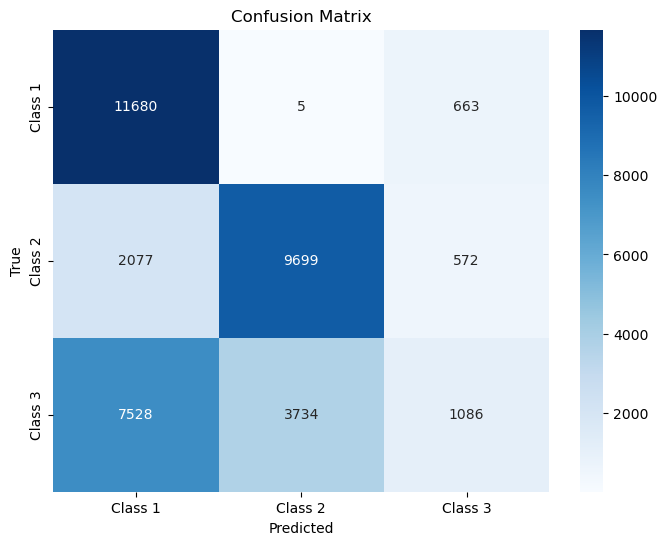

In [105]:
# Plot the confusion matrix
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_train_transformed, y_pred_light)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Comparing Models :

In [92]:
# Create a DataFrame from the scores
df_cv_scores = pd.DataFrame({
    'Model': ['Logistic', 'Decision Tree', 'Random Forest' , 'XGBoost','CatBoost' , 'XGBoost(Weight)', 'LightGBM'],
    'Mean_F1_Score': [pd.Series(scores).mean() for scores in [cv_scores1, cv_scores3, cv_scores4 , cv_scores5, cv_scores6 , f1_scores , cv_scores7]]
})
print(df_cv_scores)

             Model  Mean_F1_Score
0         Logistic       0.395584
1    Decision Tree       0.444796
2    Random Forest       0.562738
3          XGBoost       0.600207
4         CatBoost       0.517995
5  XGBoost(Weight)       0.592647
6         LightGBM       0.606443


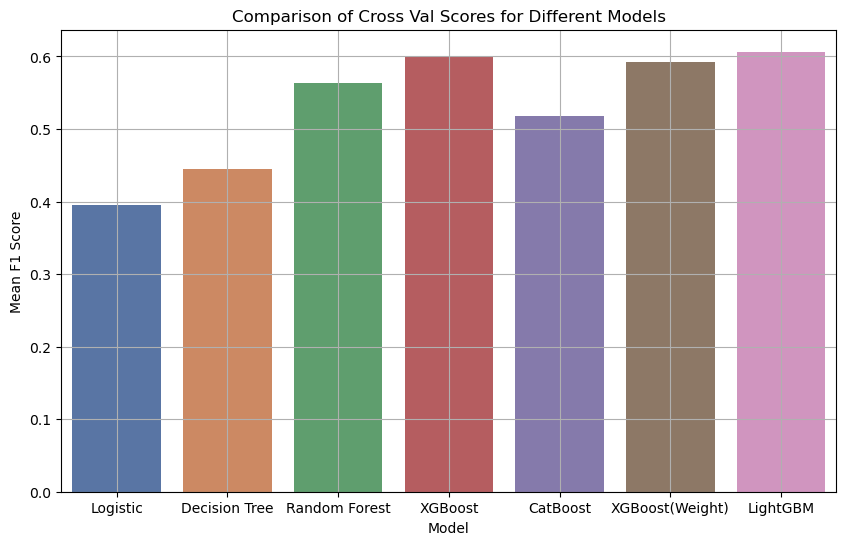

In [93]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean_F1_Score', data=df_cv_scores, palette='deep')
plt.title('Comparison of Cross Val Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean F1 Score')
plt.grid(True)
plt.show()

#### Fitting The XGBoost (Weight) :

In [106]:
model.fit(x_train_transformed, y_train_transformed , sample_weight=compute_sample_weights(y_train_transformed, class_weights))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 37044, number of used features: 50
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -0.510826


LGBMClassifier(feature_fraction=0.9, learning_rate=0.05, metric='multi_logloss',
               num_class=3, objective='multiclass')

### Feature Selection:

### Using Xgboost

In [ ]:
# Get feature importances from your trained model
feature_imp = model.feature_importances_
# Create a Series with feature importances
feature_imp_frame = pd.Series(feature_imp, index=pipeline.named_steps['preprocessor'].get_feature_names_out()).sort_values(ascending=False)
# Reset the index to create a DataFrame
feature_imp_frame = feature_imp_frame.reset_index()
feature_imp_frame.columns = ['Feature', 'Importance']  # Rename columns
# Exclude the first 9 rows and select the next 10 features (rows 10 to 19)
top_features = feature_imp_frame.iloc[9:19]
# Plot the selected features using a pie chart
fig = px.pie(top_features, names='Feature', values='Importance', title='Feature Importance')
# Show the plot
fig.show()

#### XGBOOST ON TEST DATA :

In [107]:
y_last_pred = model.predict(x_test_transformed)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [108]:
cleaned_gene = train_gene.to_csv('cleaned_gene.csv', index=False)

In [109]:
import pickle
# Save the model
with open('genes_model.pkl', 'wb') as file:
    pickle.dump(model, file)